# Imports

In [267]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [268]:
df = pd.read_csv("Iris.csv") #load the dataset
df.drop('Id',axis=1,inplace=True)

In [269]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [270]:
#Finding the optimum number of clusters for k-means classification
wcss = []
x = df.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

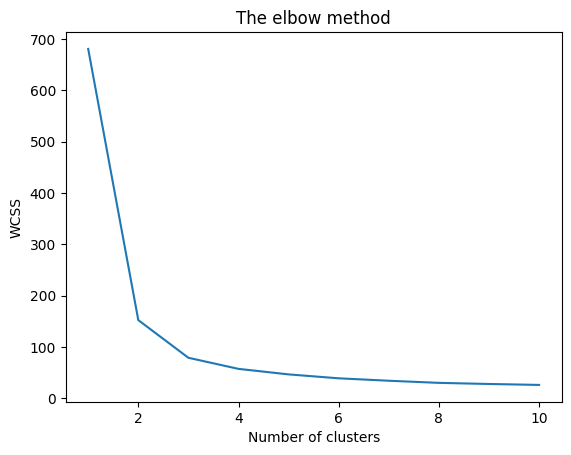

In [271]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [272]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

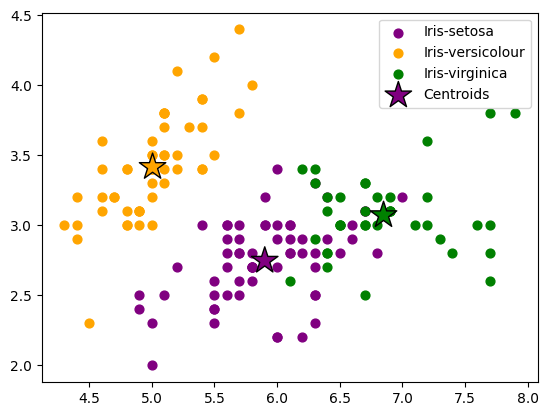

In [273]:
p_size = 40
star_size = 400

cluster_colors = ['purple', 'orange', 'green']
cluster_labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

#Visualising the clusters
for i in range(len(cluster_labels)):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = p_size, c = cluster_colors[i], label = cluster_labels[i])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = star_size, marker="*", c = cluster_colors, edgecolors='black', label = f'Centroids')

plt.legend()

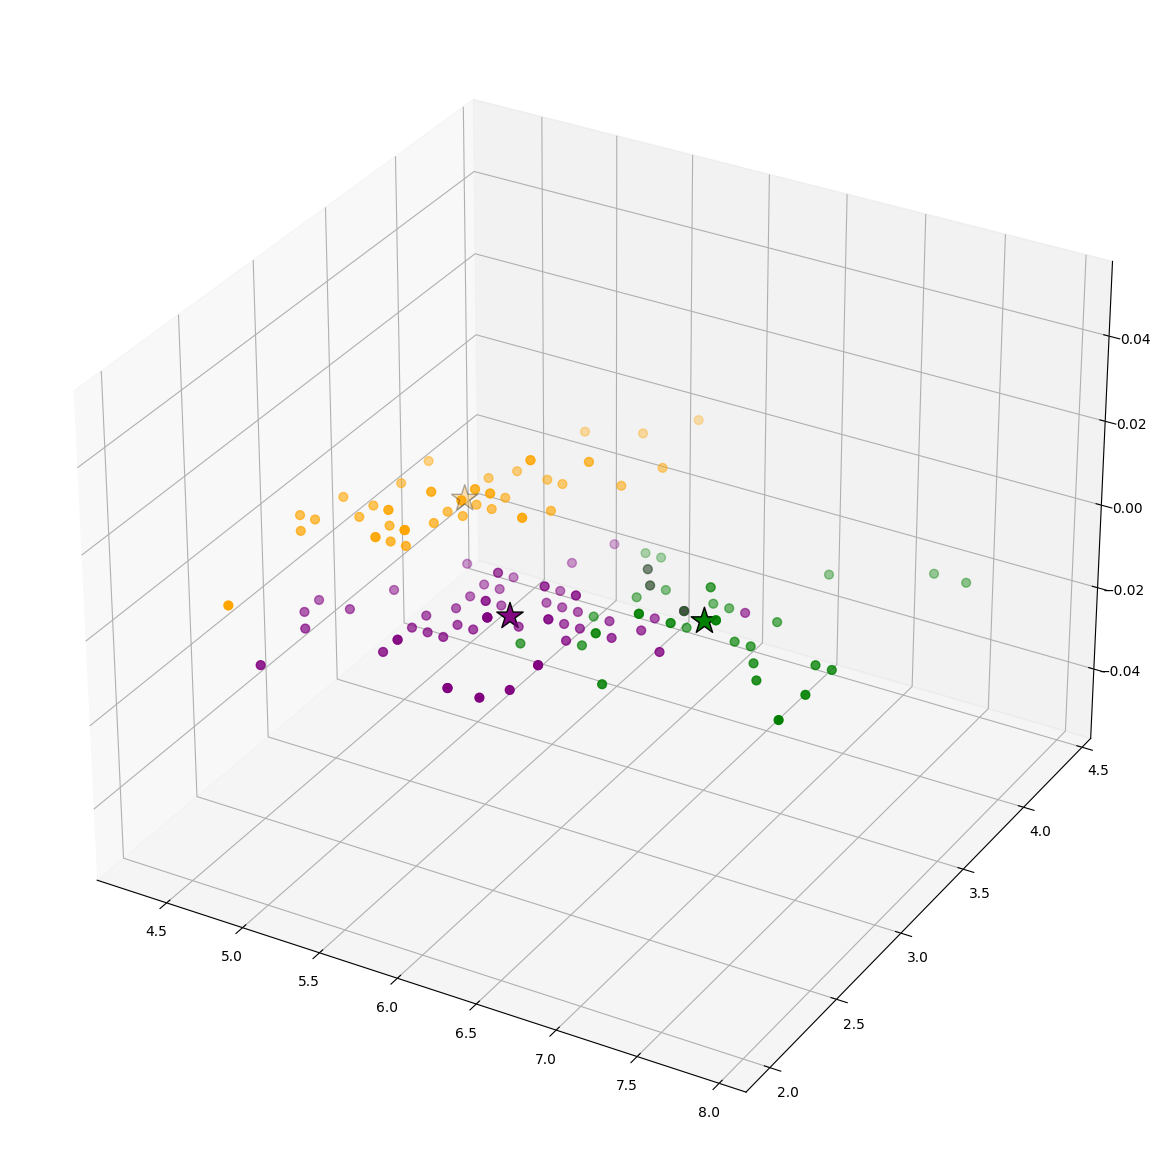

In [274]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

#Visualising the clusters
for i in range(len(cluster_labels)):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = p_size, c = cluster_colors[i], label = cluster_labels[i])

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = star_size, marker="*", c = cluster_colors, edgecolors='black', label = f'Centroids')

plt.show()